# Track particles

In [1]:
# Libraries ----
import sys  # type: ignore
import imageio  # type: ignore
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

from tqdm import tqdm  # type: ignore

sys.path.append('../modules')
import track_particles as tp  # type: ignore
import plot_tracking as plt_tp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

video_name = "3n_3m_0f_240214_2"
n_particles = int(video_name[0])
partition = 1
step = 3
t0 = int(partition * 3e4)
tf = int((partition + 1) * 3e4)
if partition == 1:
    tf = 43200 - 3 + step  # Total number of frames in video
times = np.arange(t0, tf, step)  # num_frames
save_figures = True
save_tracking = False
x_bounds = [0, 1080]
y_bounds = [70, 1840]
x_zoom = [0, 1080]
y_zoom = [0, 1920]
print("N particles:", n_particles)
print("Tracked frames from", times[0], "to", times[-1], "with", len(times), "tracked frames")

N particles: 3
Tracked frames from 30000 to 43197 with 4400 tracked frames


## Setting video information

In [3]:
# Load the video
reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# Check the number of frames
num_frames = reader.count_frames()
print("Total frames: {}".format(num_frames))

# Extract a frame to inspect the content
time = 0
frame = reader.get_data(time)
print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

Total frames: 43200
Frames resolution: 1080 x 1920


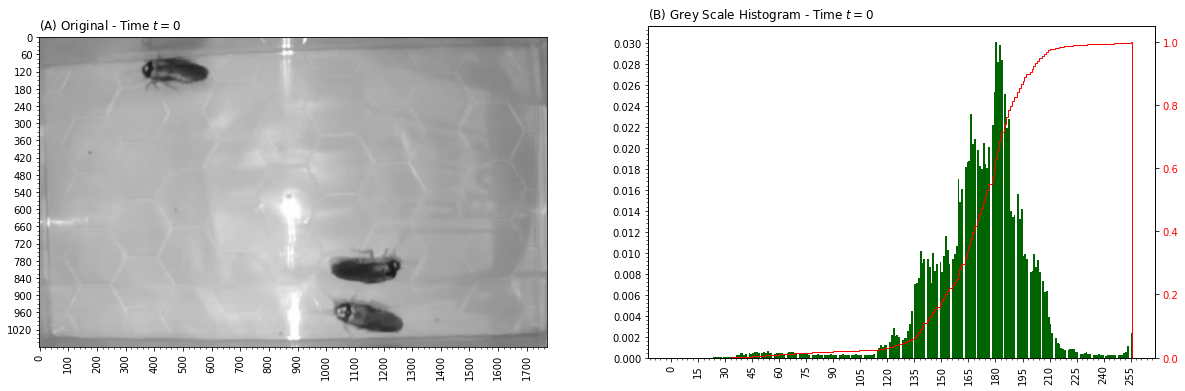

In [4]:
# Original Frame
time = 0
width = 10
width_ratio = 1
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom

plt_tp.plot_normal_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom
)

## Profiling video information

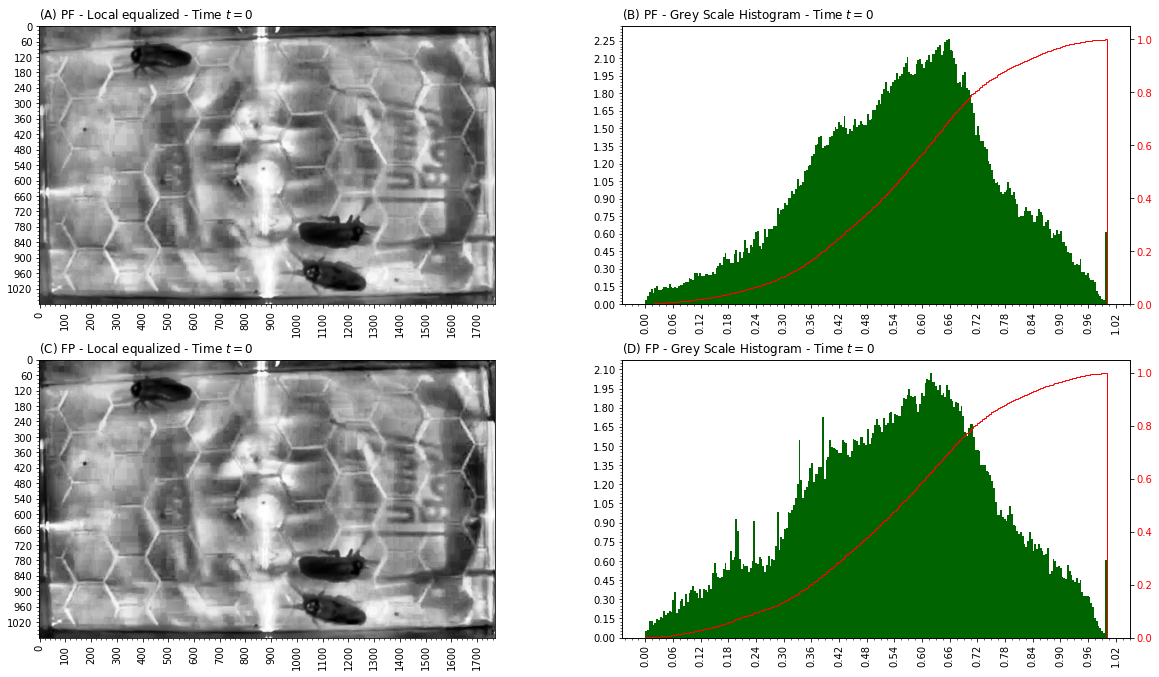

In [5]:
# Original Frame
time = 0
width = 10
width_ratio = 1
type = "local equalized"
clip_limit = 0.05
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom

plt_tp.plot_profiled_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    type=type,
    clip_limit=clip_limit,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom
)

## Boundaries and contours definition

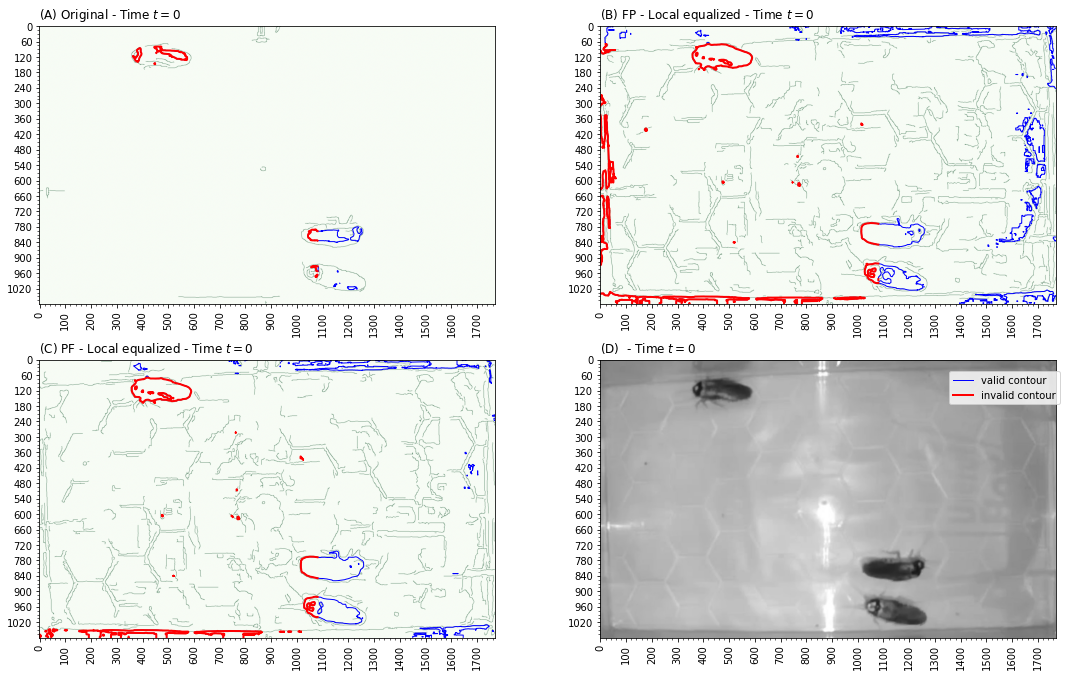

In [6]:
# Original frame
time = 0
width = 10
width_ratio = 1
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 2.0
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom
fancy_legend = True
x_legend = 0.83
y_legend = 0.46

plt_tp.plot_boundary_edge_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend
)

## Do tracking algorithm

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity
45,0,0,468.099,117.479,463.229,120.121,nan,468.099,117.479,nan,468.099,117.479,1.506,16004.000,242.117,90.973,0.927
70,1,0,1135.494,807.029,1131.088,800.919,0.000,1211.000,734.000,0.682,1184.000,785.000,1.559,19155.000,257.752,100.560,0.921
74,2,0,1139.989,976.742,1130.893,973.923,0.000,1023.000,916.000,0.690,1041.000,939.000,1.286,14893.000,237.484,86.565,0.931
76,3,0,1620.249,1051.826,1618.227,1052.056,0.000,1734.000,1030.000,0.522,1591.000,1065.000,-1.485,4352.000,224.646,48.025,0.977


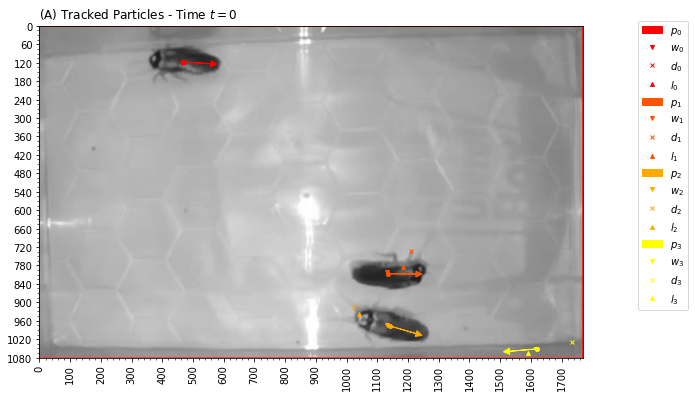

In [7]:
# Original frame
time = 0
reinforce_boundaries = True
remove_holes = False
remove_boundaries = True
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 2.0
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom
fancy_legend = True
x_legend = 1.001
y_legend = 0.891

df_tracked_frame = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    remove_boundaries=remove_boundaries,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[time, reader.get_data(time)]
)

plt_tp.plot_tracking_frame(
    reader=reader,
    df_tracked_frame=df_tracked_frame,
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend,
    save_figure=False,
    output_path=output_path,
    output_name=video_name,
    time=time
)

df_tracked_frame.style.format(precision=3)

### All frames

In [8]:
# Original frame
reinforce_boundaries = True
remove_holes = False
remove_boundaries = True
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 2.0
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20

df_tracked_frames = tp.process_multiple_frames(
    reader=reader,
    times=times,
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    remove_boundaries=remove_boundaries,
    clip_limit=clip_limit,
    type=type,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max
)

df_tracked_frames.head(n_particles)

100%|███████████████████| 4400/4400 [02:50<00:00, 25.78it/s]


,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count
0,0,30000,1511.975217,90.647880,1512.741343,91.286492,NaN,1511.975217,90.647880,NaN,1511.975217,90.647880,1.469168,7949.0,253.322874,51.586327,0.979046,4
1,1,30000,128.172958,137.034804,142.062843,135.132273,NaN,128.172958,137.034804,NaN,128.172958,137.034804,-1.406902,12240.0,219.984974,81.907260,0.928100,4
2,2,30000,1437.331767,146.477160,1431.451258,148.737354,NaN,1437.331767,146.477160,NaN,1437.331767,146.477160,1.551351,7662.0,171.285467,74.944529,0.899198,4


## Update incorrect tracked frames

In [9]:
times_new = df_tracked_frames[df_tracked_frames["id_count"] < n_particles]["time"].unique()
remove_holes_new = True
threshold_new = 0.11
sigma_new = 1.5
print("Incorrect tracking particles at {} times:\n{}".format(len(times_new), times_new))

if len(times_new > 1):
    df_tracked_frames_new = tp.process_multiple_frames(
        reader=reader,
        times=times_new,
        reinforce_boundaries=reinforce_boundaries,
        remove_holes=remove_holes_new,
        remove_boundaries=remove_boundaries,
        clip_limit=clip_limit,
        type=type,
        threshold=threshold_new,
        sigma=sigma,
        x_bounds=x_bounds,
        y_bounds=y_bounds,
        region_area_min=region_area_min,
        axis_major_min=axis_major_min,
        eccentricity_max=eccentricity_max
    )
    times_new_2 = df_tracked_frames_new[df_tracked_frames_new["id_count"] < n_particles]["time"].unique()
    print("Apply again tracking algorithm with stronger threshold and removing holes")
    print("Persistent particles untracked at {} times:\n{}".format(len(times_new_2), times_new_2))
else:
    df_tracked_frames_new = df_tracked_frames
    times_new_2 = times_new
    print("Doesn't apply again tracking algorithm with stronger threshold and removing holes")


Incorrect tracking particles at 15 times:
[32010 35676 35679 36015 36018 36024 36027 36216 36219 36888 36891 36894
 36897 37125 38634]


100%|███████████████████████| 15/15 [00:01<00:00, 12.00it/s]


Apply again tracking algorithm with stronger threshold and removing holes
Persistent particles untracked at 3 times:
[32010 35679 36894]


,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,coords_x,coords_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number
6,0,32010,1457.671642,85.791045,1460.081542,85.975659,NaN,1457.671642,85.791045,NaN,1457.671642,85.791045,"[1407, 1408, 1409, 1406, 1409, 1410, 1411, 141...","[41, 41, 41, 42, 42, 42, 42, 43, 43, 44, 44, 4...",0.924956,402.0,7886.0,402.0,193.024933,65.851380,0.940007,1
8,1,32010,1313.426955,81.059518,1313.379425,84.567505,NaN,1313.426955,81.059518,NaN,1313.426955,81.059518,"[1313, 1314, 1315, 1316, 1317, 1318, 1319, 132...","[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 4...",0.473646,2033.0,6784.0,2040.0,95.990261,63.873510,0.746472,-28
17,2,32010,1433.557968,118.693086,1432.825529,118.551512,NaN,1433.557968,118.693086,NaN,1433.557968,118.693086,"[1390, 1389, 1390, 1391, 1386, 1387, 1388, 138...","[86, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 8...",1.489555,4744.0,6410.0,4744.0,137.556711,50.538518,0.930063,0


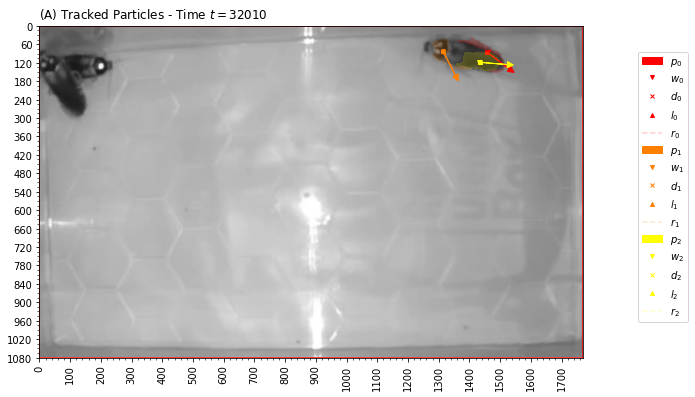

In [10]:
# Original frame
if len(times_new_2) == 0:
    times_new_2 = [t0]
time = times_new_2[0]
reinforce_boundaries = True
remove_boundaries_new = False
type = "local equalized"
clip_limit = 0.05
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom
fancy_legend = True
x_legend = 1.001
y_legend = 0.821

df_tracked_frame = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes_new,
    remove_boundaries=remove_boundaries_new,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold_new,
    sigma=sigma_new,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[time, reader.get_data(time)]
)

plt_tp.plot_tracking_frame(
    reader=reader,
    df_tracked_frame=df_tracked_frame,
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend,
    save_figure=False,
    output_path=output_path,
    output_name=video_name,
    time=time
)

df_tracked_frame


In [11]:
df_tracked_frames_final = pd.concat([df_tracked_frames, df_tracked_frames_new], ignore_index=True)
df_tracked_frames_final = (df_tracked_frames_final[
    df_tracked_frames_final["id_count"] == df_tracked_frames_final.groupby(["time", "id"])["id_count"].transform("max")
])
df_tracked_frames_final = df_tracked_frames_final.drop_duplicates(subset=["id", "time"], keep="first").sort_values(["time", "id"])

cols = ["id", "time", "id_count", "position_x", "position_y"]
print("First iteration: Tracking with threshold {}".format(threshold))

if len(times_new_2) == 0:
    times_new_2 = [t0]
print(df_tracked_frames[df_tracked_frames["time"] == times_new_2[0]][cols])
print("\nSecond iteration: Tracking with threshold {}".format(threshold_new))
print(df_tracked_frames_new[df_tracked_frames_new["time"] == times_new_2[0]][cols])
print("\nFinal tracked data")
print(df_tracked_frames_final[df_tracked_frames_final["time"] == times_new_2[0]][cols])

First iteration: Tracking with threshold 0.19
      id   time  id_count   position_x  position_y
3059   0  32010         2  1398.222994  101.785941
3060   1  32010         2   131.860613  176.505686

Second iteration: Tracking with threshold 0.11
   id   time  id_count   position_x  position_y
0   0  32010         2  1457.915709   93.122605
1   1  32010         2  1433.557968  118.693086

Final tracked data
      id   time  id_count   position_x  position_y
3059   0  32010         2  1398.222994  101.785941
3060   1  32010         2   131.860613  176.505686


## Visualize final data

In [12]:
df_tracked_frames_final["id_count"].value_counts(dropna=False, sort=False)

id_count
4    8456
3    2241
5    5950
6    1734
7     364
8      40
2       6
Name: count, dtype: int64

In [13]:
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom
fancy_legend = True
x_legend = 1.001
y_legend = 0.821

if save_figures:
    df_data = df_tracked_frames_final[["time", "id_count", "id"]].drop_duplicates()
    df_data["id_included"] = True
    df_data["orientation_included"] = True

    df_tracked_frames_final_ = df_tracked_frames_final.copy()
    if "coord_x" in df_tracked_frames_final_.columns:
        # Change coords of contours to str for correct loading of data as CSV
        df_tracked_frames_final_["coords_x"] = df_tracked_frames_final_["coords_x"].apply(lambda x: " ".join(map(str, x)))
        df_tracked_frames_final_["coords_y"] = df_tracked_frames_final_["coords_y"].apply(lambda x: " ".join(map(str, x)))
    df_tracked_frames_final_.to_csv("{}/tracked_{}_{}.csv".format(output_path, video_name, partition), index=False)

    # for time in tqdm(times):
    for time in tqdm([0, 10, 20, 50, 100]):
        plt_tp.plot_tracking_frame(
            reader=reader,
            df_tracked_frame=df_tracked_frames_final,
            width=width,
            n_x_breaks=n_x_breaks,
            n_y_breaks=n_y_breaks,
            x_bounds=x_bounds,
            y_bounds=y_bounds,
            x_zoom=x_zoom,
            y_zoom=y_zoom,
            fancy_legend=fancy_legend,
            x_legend=x_legend,
            y_legend=y_legend,
            save_figure=True,
            output_path=output_path,
            output_name=video_name,
            time=time
        )

    df_data.to_csv("{}/{}/df_control_{}.csv".format(output_path, video_name, partition), index=False)


100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


In [14]:
# Original frame
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom
fancy_legend = True
x_legend = 1.050
y_legend = 0.951
interval = 500
fps = 2
output_name = "tracked_" + video_name + "_" + str(partition)

if save_tracking:
    plt_tp.plot_tracking_animation(
        reader=reader,
        df_tracked_frames=df_tracked_frames_final,
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        x_bounds=x_bounds,
        y_bounds=y_bounds,
        x_zoom=x_zoom,
        y_zoom=y_zoom,
        fancy_legend=fancy_legend,
        x_legend=x_legend,
        y_legend=y_legend,
        interval=interval,
        fps=fps,
        output_path=output_path,
        output_name=output_name
    )

In [15]:
from shutil import make_archive

make_archive(
    "{}/{}".format(output_path, video_name),
    "zip",
    output_path,
    "{}/{}".format(output_path, video_name)
)

'/home/fabril/Github/High_Order_Interactions/tracking_videos/output_files/3n_3m_0f_240214_2.zip'